In [1]:
import pandas as pd
import leather

In [4]:
# Read data into CSV
straight = pd.read_csv('kent-county-straight-party.csv', index_col=0, thousands=',')
# Rename columns to easier names
new_col_names = {
    'Registered voters': 'registered_voters',
    'Ballots Cast': 'ballots_cast',
    'Turnout': 'turnout',
    'Democratic Party': 'dem',
    'Republican Party': 'rep',
    'Libertarian Party': 'lib',
    'US Taxpayers Party': 'tax',
    'Working Class Party': 'work',
    'Green Party': 'green',
    'Natural Law Party': 'law'
}
straight.rename(columns=new_col_names, inplace=True)
# Calculate total number of straight-party ballots
straight['total_straight'] = straight.loc[:, 'dem':'law'].sum(axis=1)
# Calculate percentage of straight-party ballots to Dems and Reps, respectively
straight['pct_dem'] = straight['dem'] / straight['total_straight'] * 100
straight['pct_rep'] = straight['rep'] / straight['total_straight'] * 100
# Get rid of the extra columns
straight = straight[['dem', 'rep', 'pct_dem', 'pct_rep']]
# Delete first row of totals
straight.drop('TOTAL', inplace=True)
straight

,dem,rep,pct_dem,pct_rep
TOTALS: 252 of 252,,,,
Ada Township Precinct 1,256,308,45.149912,54.320988
Ada Township Precinct 2,452,531,45.702730,53.690597
Ada Township Precinct 3,212,365,36.614853,63.039724
Ada Township Precinct 4,167,410,28.842832,70.811744
Ada Township Precinct 5,269,705,27.309645,71.573604
...,...,...,...,...
Wyoming City Ward 3 Precinct 26,254,274,47.476636,51.214953
Wyoming City Ward 3 Precinct 27,234,328,41.197183,57.746479
Wyoming City Ward 3 Precinct 28,379,647,36.583012,62.451737


In [5]:
# Read data into CSV
individual = pd.read_csv('kent-county-individual.csv', index_col=0, thousands=',')
# Rename columns to easier names
new_col_names = {
    'Registered voters': 'registered_voters',
    'Ballots Cast': 'ballots_cast',
    'Turnout': 'turnout',
    'Joseph R. Biden w/ Kamala D. Harris': 'biden',
    'Donald J. Trump w/ Michael R. Pence': 'trump',
    'Jo Jorgensen w/ Jeremy Cohen': 'jorgensen',
    'Don Blankenship w/ William Mohr': 'blankenship',
    'Howie Hawkins w/ Angela Walker': 'hawkins',
    'Rocky De La Fuente w/ Darcy Richardson': 'de_la_fuente',
    'Total write-in': 'total_write_in'
}
individual.rename(columns=new_col_names, inplace=True)
# Calculate total number of individual ballots
individual['total_individual'] = individual.loc[:, 'biden':'total_write_in'].sum(axis=1)
# Calculate percentage of individual ballots to Biden and Trump, respectively
individual['pct_biden'] = individual['biden'] / individual['total_individual'] * 100
individual['pct_trump'] = individual['trump'] / individual['total_individual'] * 100
# Get rid of the extra columns
individual = individual[['biden', 'trump', 'pct_biden', 'pct_trump']]
# Delete first row of totals
individual.drop('TOTAL', inplace=True)
individual

,biden,trump,pct_biden,pct_trump
TOTALS: 252 of 252,,,,
Ada Township Precinct 1,593,473,54.553818,43.514259
Ada Township Precinct 2,1043,886,52.997967,45.020325
Ada Township Precinct 3,512,592,44.716157,51.703057
Ada Township Precinct 4,402,554,41.273101,56.878850
Ada Township Precinct 5,682,1032,38.816164,58.736483
...,...,...,...,...
Wyoming City Ward 3 Precinct 26,526,419,54.507772,43.419689
Wyoming City Ward 3 Precinct 27,461,476,48.070907,49.635036
Wyoming City Ward 3 Precinct 28,761,981,42.824986,55.205402


In [6]:
# Merge the data into a single table (unnecessary, but helpful)
data = straight.merge(individual, left_index=True, right_index=True)
data

,dem,rep,pct_dem,pct_rep,biden,trump,pct_biden,pct_trump
TOTALS: 252 of 252,,,,,,,,
Ada Township Precinct 1,256,308,45.149912,54.320988,593,473,54.553818,43.514259
Ada Township Precinct 2,452,531,45.702730,53.690597,1043,886,52.997967,45.020325
Ada Township Precinct 3,212,365,36.614853,63.039724,512,592,44.716157,51.703057
Ada Township Precinct 4,167,410,28.842832,70.811744,402,554,41.273101,56.878850
Ada Township Precinct 5,269,705,27.309645,71.573604,682,1032,38.816164,58.736483
...,...,...,...,...,...,...,...,...
Wyoming City Ward 3 Precinct 26,254,274,47.476636,51.214953,526,419,54.507772,43.419689
Wyoming City Ward 3 Precinct 27,234,328,41.197183,57.746479,461,476,48.070907,49.635036
Wyoming City Ward 3 Precinct 28,379,647,36.583012,62.451737,761,981,42.824986,55.205402


In [7]:
# Create new columns for y-axes
data['pct_trump-pct_rep'] = data['pct_trump'] - data['pct_rep']
data['pct_biden-pct_dem'] = data['pct_biden'] - data['pct_dem']
data

,dem,rep,pct_dem,pct_rep,biden,trump,pct_biden,pct_trump,pct_trump-pct_rep,pct_biden-pct_dem
TOTALS: 252 of 252,,,,,,,,,,
Ada Township Precinct 1,256,308,45.149912,54.320988,593,473,54.553818,43.514259,-10.806728,9.403906
Ada Township Precinct 2,452,531,45.702730,53.690597,1043,886,52.997967,45.020325,-8.670271,7.295237
Ada Township Precinct 3,212,365,36.614853,63.039724,512,592,44.716157,51.703057,-11.336667,8.101304
Ada Township Precinct 4,167,410,28.842832,70.811744,402,554,41.273101,56.878850,-13.932894,12.430268
Ada Township Precinct 5,269,705,27.309645,71.573604,682,1032,38.816164,58.736483,-12.837121,11.506519
...,...,...,...,...,...,...,...,...,...,...
Wyoming City Ward 3 Precinct 26,254,274,47.476636,51.214953,526,419,54.507772,43.419689,-7.795264,7.031137
Wyoming City Ward 3 Precinct 27,234,328,41.197183,57.746479,461,476,48.070907,49.635036,-8.111442,6.873724
Wyoming City Ward 3 Precinct 28,379,647,36.583012,62.451737,761,981,42.824986,55.205402,-7.246335,6.241974


In [8]:
# Format Trump data for Leather
trump_x = data['pct_rep']
trump_y = data['pct_trump-pct_rep']
trump_points = list(zip(trump_x, trump_y))
trump_points

[(54.32098765432099, -10.806728224698176),
 (53.69059656218403, -8.670271358931998),
 (63.03972366148531, -11.33666689292636),
 (70.81174438687393, -13.932894284204515),
 (71.57360406091371, -12.837121420048604),
 (55.660377358490564, -9.375359088088615),
 (56.59574468085107, -12.52459843579178),
 (63.05147058823529, -11.169476691999279),
 (70.78313253012048, -4.880291100239646),
 (71.35549872122762, -6.4166938256192765),
 (75.20372526193248, -6.897714332970736),
 (65.24908869987848, -4.896976023822148),
 (69.4468085106383, -11.774599484510041),
 (61.935483870967744, -3.2672863968001167),
 (51.69491525423729, -4.305357021305561),
 (56.18090452261306, -7.56152173972189),
 (60.1025641025641, -1.4667693591348225),
 (71.08695652173913, -5.094090885591683),
 (30.194319880418536, -0.8104336244943688),
 (82.45901639344262, -9.769940763190533),
 (78.70813397129187, -10.327788202411071),
 (76.38888888888889, -10.761358524516424),
 (50.9469696969697, -1.3962636635935795),
 (85.28911564625851, -9

In [9]:
# Format Biden data for Leather
biden_x = data['pct_dem']
biden_y = data['pct_biden-pct_dem']
biden_points = list(zip(biden_x, biden_y))
biden_points

[(45.14991181657848, 9.403906030707631),
 (45.70273003033367, 7.29523744934113),
 (36.61485319516407, 8.101304010076099),
 (28.842832469775477, 12.430268146240952),
 (27.30964467005076, 11.506519245714756),
 (43.160377358490564, 8.118550777928434),
 (42.340425531914896, 10.920444033302502),
 (36.213235294117645, 9.564994614325897),
 (28.162650602409638, 3.368055172109152),
 (27.74936061381074, 5.511978479061835),
 (23.864959254947614, 6.667827630298284),
 (33.41433778857837, 4.754676295928668),
 (29.872340425531913, 10.602718956890886),
 (36.55913978494624, 2.13201980173573),
 (46.440677966101696, 4.462936491729629),
 (42.51256281407036, 6.756522188636737),
 (37.94871794871795, 1.8510317383909367),
 (26.956521739130434, 5.623739854210822),
 (67.41405082212258, 1.3063283247968513),
 (17.04918032786885, 8.25427438735057),
 (20.095693779904305, 8.2937511700502),
 (22.708333333333332, 9.923245614035093),
 (46.875, 0.8143453145057791),
 (14.370748299319727, 8.035033838006035),
 (17.60242792

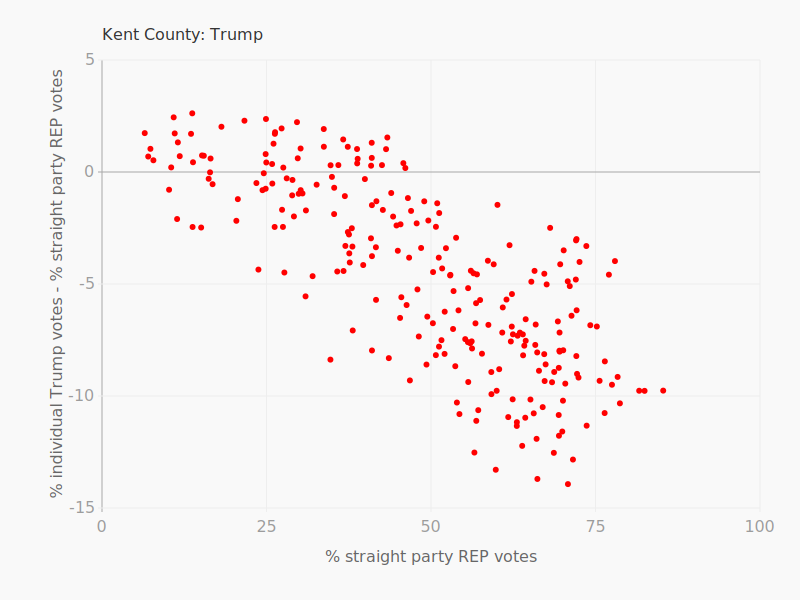

In [10]:
# Plot Trump data
trump_chart = leather.Chart('Kent County: Trump')
trump_chart.add_dots(trump_points, radius=3, fill_color='red')
trump_chart.add_x_axis(name='% straight party REP votes')
trump_chart.add_y_axis(name='% individual Trump votes - % straight party REP votes')
trump_chart.to_svg()

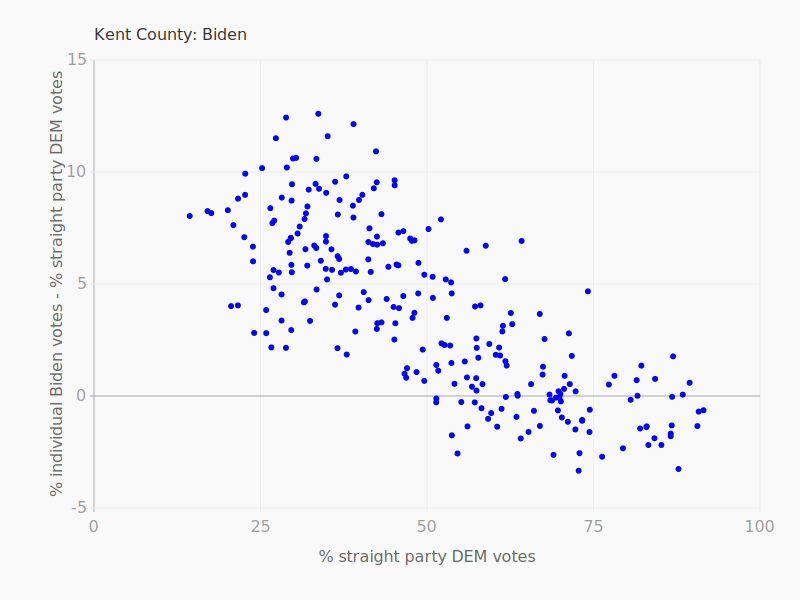

In [11]:
# Plot Biden data
biden_chart = leather.Chart('Kent County: Biden')
biden_chart.add_dots(biden_points, radius=3, fill_color='blue')
biden_chart.add_x_axis(name='% straight party DEM votes')
biden_chart.add_y_axis(name='% individual Biden votes - % straight party DEM votes')
biden_chart.to_svg()

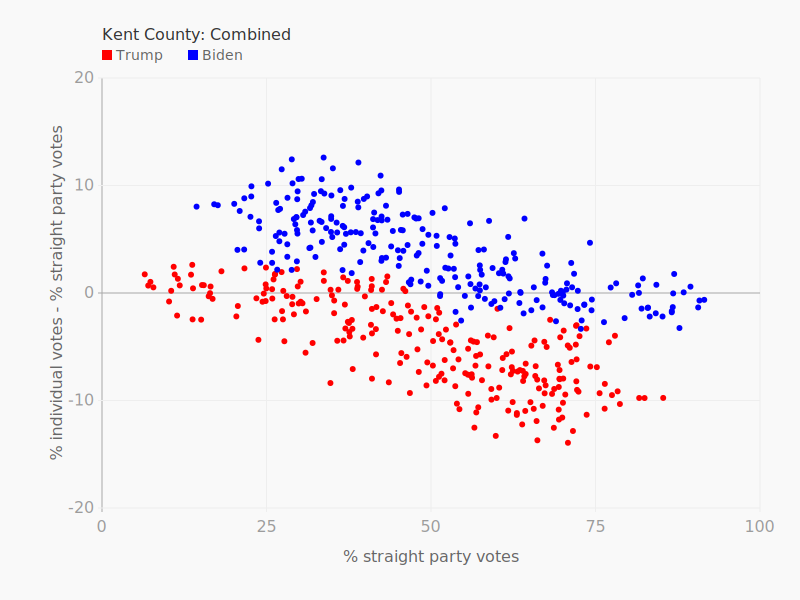

In [12]:
# Plot both on one set of axes
combined_chart = leather.Chart('Kent County: Combined')
combined_chart.add_dots(trump_points, radius=3, name='Trump', fill_color='red')
combined_chart.add_dots(biden_points, radius=3, name='Biden', fill_color='blue')
combined_chart.add_x_axis(name='% straight party votes')
combined_chart.add_y_axis(name='% individual votes - % straight party votes')
combined_chart.to_svg()